# Survey Data Comparison

In this file, the questions from Abram Miller's *Improving Research Software Engineering in Mathematics* (IRSEM) survey are compared directly to the survey conducted by Carver et. al. (URSSI). 

##### Load data and functions:

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

IRSEM = pd.read_csv('../data/IRSEM_Results.csv')
URSSI = pd.read_csv('../data/URSSI_survey_anonymized20210930.csv')

In [91]:
### print functions ###

# function: print the answer counts and percentage for a given question
def print_question(question="Q0.1", survey = 0, percentages = True):
    if (survey == 0 or survey == 1):
        questions = IRSEM[question][2:]
        if (percentages):
            df = pd.concat([questions.value_counts(), questions.value_counts(normalize=True)], axis = 1, keys=["count", "percentage"])
        else:
            df = pd.concat([questions.value_counts()], axis = 1, keys=["count"])
        print ("IRSEM: \n", df)

    if (survey == 0): print("\n - - - - -\n")

    if (survey == 0 or survey == 2):
        questions = URSSI[question][2:]
        if (percentages):
            df = pd.concat([questions.value_counts(), questions.value_counts(normalize=True)], axis = 1, keys=["count", "percentage"])
        else:
            df = pd.concat([questions.value_counts()], axis = 1, keys=["count"])
        print ("URSSI: \n", df)

# Print a set of questions (Likert Matrix)
def print_question_set(question = "", statements = [], survey = 0, percentages = True):
    div = "___________________"
    for i, statement in enumerate(statements): 
        print(statement + ":\n")
        print_question(question + "_" + str(i + 1), survey=survey, percentages=percentages)
        if (i < len(statements) - 1):
            print("\n", div*3, "\n")


### these functions are relevant to the multiple choice questions ###

# function: find counts of each answer type on each question
def get_ans_counts(questions):
    ANSWERCOUNTS = {category: [] for category in Answer_types}
    for label, data in questions:
        for category in Answer_types:
            count = data.value_counts().get(category, 0)
            ANSWERCOUNTS[category].append(count)
    #print(ANSWERCOUNTS)
    return ANSWERCOUNTS

# function: get the percentages from the total counts of each category's responses
def get_percentages(questions, counts):
    totals = [0] * len(questions)
    for category in Answer_types:
        for q in range(len(questions)):
            totals[q] += counts[category][q]

    PERCENTAGES = {category: [] for category in Answer_types}
    i = 0
    for label, data in questions:
        for category in Answer_types:
            percent = data.value_counts().get(category, 0) * (1 / totals[i]) * 100
            PERCENTAGES[category].append(percent)
        i += 1
    #print(totals)
    return PERCENTAGES



# Respondent Demographics 

##### Q0.1: Which profile matches the work you perform?

<strong>Researchers (pure user) </strong>&ndash; I primarily use software to do my research. I have contributed to local software development, but only in a limited capacity. I have the ability to recognize and report bugs. I don&rsquo;t build new software myself, but I occasionally modify existing software for my own needs.

<strong>Developers (pure software developer)</strong> &ndash; I primarily write software for others to use. I contribute to collaborative software projects. I maintain a package or distribution

<strong>Combination</strong> &ndash; I have attributes of both &ldquo;Researchers&rdquo; and &ldquo;Developers.&rdquo; I both use software for my own research and write software that other researchers use for their research

IRSEM: 
              count  percentage
Q0.1                          
Combination     27    0.586957
Researchers     15    0.326087
Developers       4    0.086957

 - - - - -

URSSI: 
              count  percentage
Q0.1                          
Combination    544    0.491863
Researchers    473    0.427667
Developers      89    0.080470


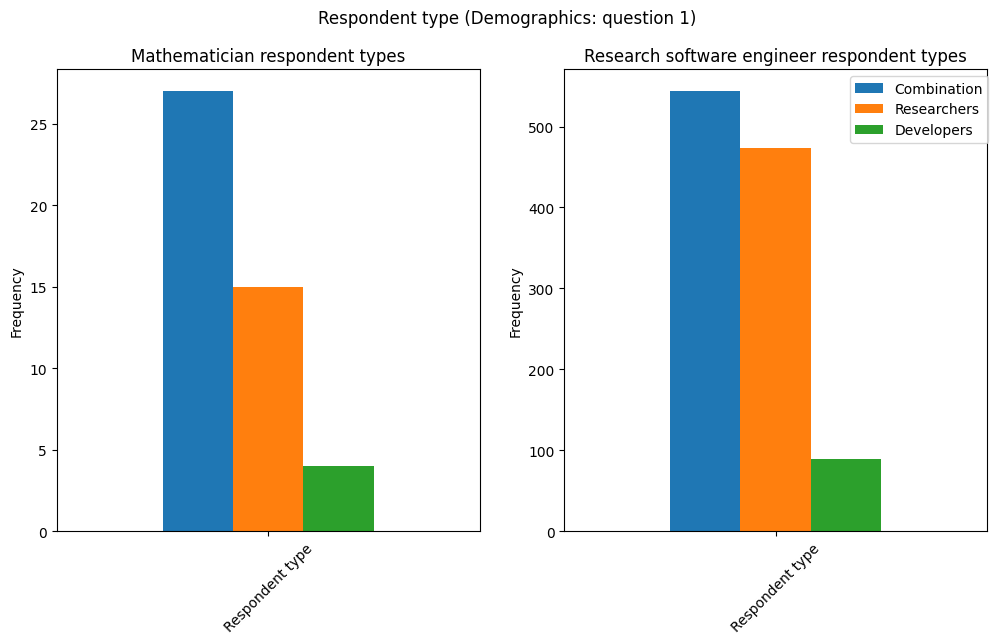

In [92]:
# Print raw data
print_question("Q0.1")

# select question / question segments
# this works because the surveys have synced up questions!
def set_questions(survey):
    return [('Respondent type', survey["Q0.1"][2:])]

# possible text answers
Answer_types = [
    'Combination',
    'Researchers',
    'Developers']

QUESTIONS = set_questions(IRSEM)

# create dataframe
df1 = pd.DataFrame(get_ans_counts(QUESTIONS), index=[label[0] for label in QUESTIONS])

# repeat for second survey
QUESTIONS = set_questions(URSSI)

df2 = pd.DataFrame(get_ans_counts(QUESTIONS), index=[label[0] for label in QUESTIONS])


# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Respondent type (Demographics: question 1)')

ax1 = df1.plot.bar(rot=0, ax=ax1)
ax1.set_title('Mathematician respondent types')
ax1.set_ylabel('Frequency')
ax1.tick_params('x',labelrotation=45)
#ax1.set_yticks(np.arange(0, 100.1, 10))
ax1.get_legend().remove()

ax2 = df2.plot.bar(rot=0, ax=ax2)
ax2.set_title('Research software engineer respondent types')
ax2.set_ylabel('Frequency')
ax2.tick_params('x',labelrotation=45)
#ax2.set_yticks(np.arange(0, 100.1, 10))

# edit parameters
plt.legend(bbox_to_anchor=(1.02, 1))
plt.gcf().set_size_inches(12, 6)
plt.show()


##### Q0.2: What type of organization do you work for?

Educational institution

National lab

Industry

Other

In [93]:
print_question("Q0.2", percentages=True)

IRSEM: 
                          count  percentage
Q0.2                                      
Educational institution     35    0.760870
Other:                       5    0.108696
Industry                     5    0.108696
National lab                 1    0.021739

 - - - - -

URSSI: 
                          count  percentage
Q0.2                                      
Educational institution    901    0.857279
National lab                62    0.058991
Other                       49    0.046622
Industry                    39    0.037108


##### Q0.3: In which country do you currently reside?

In [94]:
print_question("Q0.3")

IRSEM: 
                                                     count  percentage
Q0.3                                                                 
United States of America                               28    0.608696
Germany                                                 4    0.086957
France                                                  2    0.043478
Austria                                                 2    0.043478
Canada                                                  2    0.043478
Italy                                                   2    0.043478
Switzerland                                             1    0.021739
Colombia                                                1    0.021739
South Korea                                             1    0.021739
United Kingdom of Great Britain and Northern Ir...      1    0.021739
Australia                                               1    0.021739
Israel                                                  1    0.021739

 - - - - -

##### Q0.4: What is your professional title?

Postdoc

Graduate Student

Research Engineer

Research Faculty

Research Software Engineer

Manager

Other

In [95]:
print_question("Q0.4")

IRSEM: 
                             count  percentage
Q0.4                                         
Faculty                        17    0.369565
Postdoc                         9    0.195652
Graduate Student                8    0.173913
Other                           6    0.130435
Research Software Engineer      3    0.065217
Research Faculty                2    0.043478
Research Engineer               1    0.021739

 - - - - -

URSSI: 
                             count  percentage
Q0.4                                         
Faculty                       669    0.637750
Other                         149    0.142040
Research Faculty               59    0.056244
Research Software Engineer     43    0.040991
Graduate Student               39    0.037178
Manager                        38    0.036225
Postdoc                        36    0.034318
Research Engineer              16    0.015253


##### Q0.5: What is you age?

19 - 24

25 - 34

35 - 44

45 - 54

55 - 64

65 - 74

75 - 84

85 or older

In [96]:
print_question("Q0.5")

IRSEM: 
          count  percentage
Q0.5                      
35 - 44     21    0.456522
25 - 34     15    0.326087
19 - 24      3    0.065217
45 - 54      3    0.065217
65 - 74      2    0.043478
55 - 64      1    0.021739
75 - 84      1    0.021739

 - - - - -

URSSI: 
              count  percentage
Q0.5                          
35 - 44        366    0.352601
45 - 54        254    0.244701
55 - 64        184    0.177264
25 - 34        162    0.156069
65 - 74         53    0.051060
18 - 24         10    0.009634
75 - 84          8    0.007707
85 or older      1    0.000963


##### Q0.6: How many years have you worked in research?

Less than 1 year

1 - 5 years

6 - 10 years

11 - 15 years

16 - 20 years

20 or more years

In [97]:
print_question("Q0.6")

IRSEM: 
                   count  percentage
Q0.6                               
11 - 15 years        11    0.239130
1 - 5 years          11    0.239130
6 - 10 years          9    0.195652
20 or more years      6    0.130435
16 - 20 years         5    0.108696
Less than 1 year      4    0.086957

 - - - - -

URSSI: 
                     count  percentage
Q0.6                                 
More than 20 years    410    0.393097
11 - 15 years         212    0.203260
16-20 years           178    0.170662
6 - 10 years          162    0.155321
1 - 5 years            76    0.072867
Less than 1 year        5    0.004794


##### Q0.7: What is your gender?

Male

Female

Non-binary / third gender

Prefer not to say

In [98]:
print_question("Q0.7")

IRSEM: 
                    count  percentage
Q0.7                                
Male                  39    0.847826
Female                 6    0.130435
Prefer not to say      1    0.021739

 - - - - -

URSSI: 
                       count  percentage
Q0.7                                   
Male                    734    0.704415
Female                  268    0.257198
Prefer not to answer     36    0.034549
Other                     4    0.003839


##### Q0.8: How often do you work on projects that have the following team size?

|                   | Never | Sometimes | About half the time | Most of the time | Always |
| ----------------- | - | - | - | - | - |
| **1 person**      | o | o | o | o | o |
| **2 - 5 people**  | o | o | o | o | o |
| **6 - 20 people** | o | o | o | o | o |
| **20+ people**    | o | o | o | o | o |

In [99]:
print_question_set("Q0.8", ["1 Person", 
                            "2 - 5 people", 
                            "6-10 people", 
                            "20+ people"])



1 Person:

IRSEM: 
                      count  percentage
Q0.8_1                                
Sometimes               22    0.478261
Most of the time        10    0.217391
About half the time      9    0.195652
Never                    4    0.086957
Always                   1    0.021739

 - - - - -

URSSI: 
                      count  percentage
Q0.8_1                                
Sometimes              477    0.520174
About half the time    150    0.163577
Most of the time       120    0.130862
Never                  115    0.125409
Always                  55    0.059978

 _________________________________________________________ 

2 - 5 people:

IRSEM: 
                      count  percentage
Q0.8_2                                
Sometimes               17    0.369565
Most of the time        15    0.326087
About half the time     12    0.260870
Never                    2    0.043478

 - - - - -

URSSI: 
                      count  percentage
Q0.8_2                         

# RQ1: Software Development Practices
What activities do research software developers spend their time on, and how does this impact the perceived quality and long-term accessibility of research software?

For the following questions, think about your most recently completed software project and answer based on your experiences in that project.

[Note: This section only appears for respondent types “Developer” or “Combination”]

##### Q1.1: To what extent was the software targeted at each of these groups of users?

|                              | Not at all | Secondary target | Primary target |
| ---------------------------- | - | - | - |
| **Just me**                  | o | o | o |
| **Just my team**             | o | o | o |
| **Just my discipline**       | o | o | o |
| **More than one discipline** | o | o | o |

In [100]:
print_question_set("Q1.1", ["Just me", 
                            "Just my team", 
                            "Just my discipline", 
                            "More than one discipline"])

Just me:

IRSEM: 
                   count  percentage
Q1.1_1                             
Not at all            9    0.409091
Primary target        9    0.409091
Secondary target      4    0.181818

 - - - - -

URSSI: 
                   count  percentage
Q1.1_1                             
Not at all          156    0.379562
Primary target      133    0.323601
Secondary target    122    0.296837

 _________________________________________________________ 

Just my team:

IRSEM: 
                   count  percentage
Q1.1_2                             
Secondary target     11    0.500000
Not at all           10    0.454545
Primary target        1    0.045455

 - - - - -

URSSI: 
                   count  percentage
Q1.1_2                             
Primary target      205    0.482353
Secondary target    150    0.352941
Not at all           70    0.164706

 _________________________________________________________ 

Just my discipline:

IRSEM: 
                   count  percentage
Q1.

##### Q1.2: What percent of your time did you actually spend in the following activities? *(total should be 100%)*

Requirements gathering / documentation:

Software architecture / design:

Coding:

Testing:

Debugging:

Maintenance:

Documentation:

Meetings:

Training:

Other:

##### Q1.3: What percent of time would you have <u>**liked**</u> to have spent in each activity?
*(total should be 100%)*

Requirements gathering / documentation:

Software architecture / design:

Coding:

Testing:

Debugging:

Maintenance:

Documentation:

Meetings:

Training:

Other:

##### Q1.4: Which of the following types of testing did you employ?

|                 | Frequently | Somewhat | Rarely | Never |
| --------------- | - | - | - | - |
| **Unit**        | o | o | o | o |
| **Integration** | o | o | o | o |
| **System**      | o | o | o | o |
| **User**        | o | o | o | o |
| **Regression**  | o | o | o | o |

Unit:

IRSEM: 
             count  percentage
Q1.4_1                       
Frequently      9    0.409091
Somewhat        6    0.272727
Rarely          4    0.181818
Never           3    0.136364

 - - - - -

URSSI: 
             count  percentage
Q1.4_1                       
Frequently    231    0.509934
Somewhat      108    0.238411
Rarely         62    0.136865
Never          52    0.114790

 _________________________________________________________ 

Integration:

IRSEM: 
             count  percentage
Q1.4_2                       
Frequently     10    0.454545
Somewhat        6    0.272727
Never           4    0.181818
Rarely          2    0.090909

 - - - - -

URSSI: 
             count  percentage
Q1.4_2                       
Somewhat      171    0.379157
Frequently    155    0.343681
Rarely         69    0.152993
Never          56    0.124169

 _________________________________________________________ 

System:

IRSEM: 
             count  percentage
Q1.4_3                   

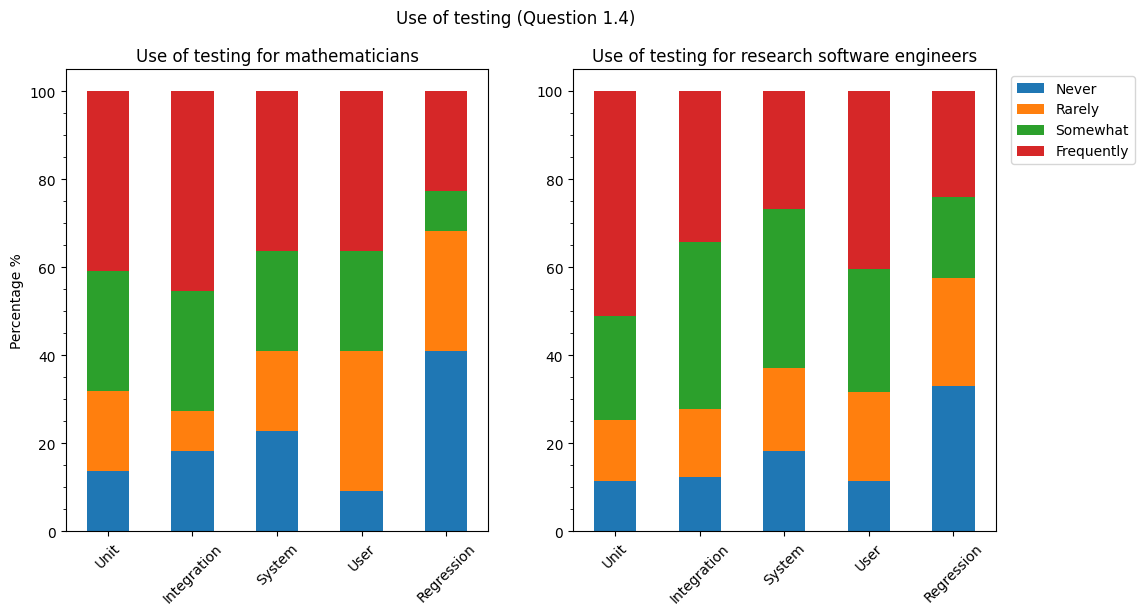

In [101]:
print_question_set("Q1.4", ["Unit", 
                            "Integration", 
                            "System", 
                            "User", 
                            "Regression"])


# select question / question segments
# this works because the surveys have synced up questions!
def set_questions(survey):
    return [('Unit',            survey["Q1.4_1"][2:]), 
            ('Integration',     survey["Q1.4_2"][2:]), 
            ('System',          survey["Q1.4_3"][2:]), 
            ('User',            survey["Q1.4_4"][2:]), 
            ('Regression',      survey["Q1.4_5"][2:])]

# possible text answers
Answer_types = [
    'Never',
    'Rarely',
    'Somewhat',
    'Frequently']

QUESTIONS = set_questions(IRSEM)

# create dataframe
df1 = pd.DataFrame(get_percentages(QUESTIONS, get_ans_counts(QUESTIONS)), index=[label[0] for label in QUESTIONS])

# repeat for second survey
QUESTIONS = set_questions(URSSI)

df2 = pd.DataFrame(get_percentages(QUESTIONS, get_ans_counts(QUESTIONS)), index=[label[0] for label in QUESTIONS])


# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Use of testing (Question 1.4)') # Title

ax1 = df1.plot.bar(rot=0, ax=ax1, stacked = True)
ax1.set_title('Use of testing for mathematicians')
ax1.set_ylabel('Percentage %')
ax1.tick_params('x',labelrotation=45)
ax1.set_yticks(np.arange(0, 100.1, 5), minor=True)
ax1.get_legend().remove()

ax2 = df2.plot.bar(rot=0, ax=ax2, stacked = True)
ax2.set_title('Use of testing for research software engineers')
ax2.set_ylabel('')
ax2.tick_params('x',labelrotation=45)
ax2.set_yticks(np.arange(0, 100.1, 5), minor=True)

# edit parameters
plt.legend(bbox_to_anchor=(1.02, 1))
plt.gcf().set_size_inches(12, 6)
plt.show()

##### Q1.5: Did you release the software under an open-source license?
Yes / No

In [102]:
print_question("Q1.5")

IRSEM: 
       count  percentage
Q1.5                   
Yes      21    0.954545
No        1    0.045455

 - - - - -

URSSI: 
       count  percentage
Q1.5                   
Yes     349    0.740977
No      122    0.259023


# RQ2: Development Infrastructure and Tools
What tools do research software developers use and what additional tools are needed to support sustainable development practices?

[Note: This section only appears for respondent types “Developer” or “Combination”]

The following questions are about software development infrastructure, tools, and practices with which you may use or are familiar.

##### Q2.1: In the last 5 years, how much experience do you have with each of the following types of projects:

|     | None | 1-3 projects | 4+ projects
| --- | - | - | - |
| <strong>Single developer</strong> | o | o | o |
| <strong>Co-located team </strong>(i.e. a team, located in a single place or institution with well-coordinated funding/organization) | o | o | o |
| <strong>Distributed team</strong> (i.e. a well-defined team, located in multiple places or institutions with well-coordinated funding/organization) | o | o | o |
| <strong>Open-source community</strong> (i.e. a group of developers who are distributed and working under multiple independant funding sources) | o | o | o |

In [103]:
print_question_set("Q2.1", ["Single developer", 
                            "Co-located team",
                            "Distributed team",
                            "Open-source community"])

Single developer:

IRSEM: 
               count  percentage
Q2.1_1                         
1-3 projects     11    0.578947
4+ projects       8    0.421053

 - - - - -

URSSI: 
               count  percentage
Q2.1_1                         
1-3 projects    222    0.689441
4+ projects     100    0.310559

 _________________________________________________________ 

Co-located team:

IRSEM: 
               count  percentage
Q2.1_2                         
1-3 projects     11    0.733333
4+ projects       4    0.266667

 - - - - -

URSSI: 
               count  percentage
Q2.1_2                         
1-3 projects    260    0.730337
4+ projects      96    0.269663

 _________________________________________________________ 

Distributed team:

IRSEM: 
               count  percentage
Q2.1_3                         
1-3 projects     10    0.666667
4+ projects       5    0.333333

 - - - - -

URSSI: 
               count  percentage
Q2.1_3                         
1-3 projects    270    

##### Q2.2: How well do current tools support each of the following activities?

|   | Extremely supported | Very supported | Moderately supported | Slightly supported | Not supported at all |
| - | - | - | - | - | - |
| **Requirements gathering / documentation** | o | o | o | o | o |
| **Software architecture / design** | o | o | o | o | o |
| **Coding** | o | o | o | o | o |
| **Testing** | o | o | o | o | o |
| **Debugging** | o | o | o | o | o |
| **Maintenance** | o | o | o | o | o |
| **Documentation** | o | o | o | o | o |

Figure 4: Availability of tool support. (Question 2.2)

Requirements:

IRSEM: 
                       count  percentage
Q2.2_1                                 
Moderately supported      9        0.45
Slightly supported        6        0.30
Very supported            2        0.10
Not supported at all      2        0.10
Extremely supported       1        0.05

 - - - - -

URSSI: 
                       count  percentage
Q2.2_1                                 
Slightly supported      155    0.356322
Moderately supported    127    0.291954
Not supported at all     91    0.209195
Very supported           51    0.117241
Extremely supported      11    0.025287

 _________________________________________________________ 

SW Arch/Design:

IRSEM: 
                       count  percentage
Q2.2_2                                 
Moderately supported      7        0.35
Slightly supported        6        0.30
Very supported            5        0.25
Not supported at all      2        0.10

 - - - - -

URSSI: 
                       count  percentage
Q2.2

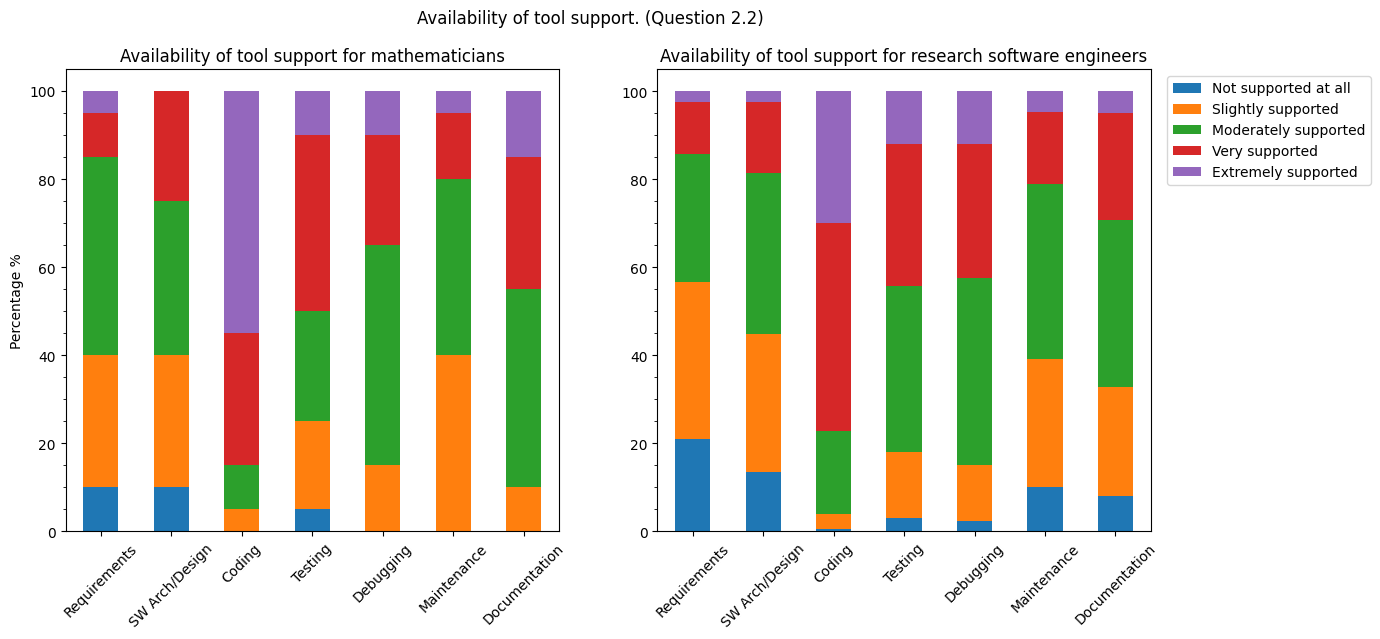

In [ ]:

print_question_set("Q2.2", ['Requirements', 
                            'SW Arch/Design', 
                            'Coding', 
                            'Testing',
                            'Debugging',
                            'Maintenance',
                            'Documentation'])

# select question / question segments
def set_questions(survey):
    return [('Requirements',            survey["Q2.2_1"][2:]), 
            ('SW Arch/Design',          survey["Q2.2_2"][2:]), 
            ('Coding',                  survey["Q2.2_3"][2:]), 
            ('Testing',                 survey["Q2.2_4"][2:]), 
            ('Debugging',               survey["Q2.2_5"][2:]), 
            ('Maintenance',             survey["Q2.2_6"][2:]), 
            ('Documentation',           survey["Q2.2_7"][2:])]

# possible text answers
Answer_types = [
    'Not supported at all',
    'Slightly supported',
    'Moderately supported',
    'Very supported', 
    'Extremely supported']

QUESTIONS = set_questions(IRSEM)

# create dataframe
df1 = pd.DataFrame(get_percentages(QUESTIONS, get_ans_counts(QUESTIONS)), index=[label[0] for label in QUESTIONS])

# repeat for second survey
QUESTIONS = set_questions(URSSI)

df2 = pd.DataFrame(get_percentages(QUESTIONS, get_ans_counts(QUESTIONS)), index=[label[0] for label in QUESTIONS])

# plot
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Availability of tool support. (Question 2.2)')

ax1 = df1.plot.bar(rot=0, ax=ax1, stacked = True)
ax1.set_title('Availability of tool support for mathematicians')
ax1.set_ylabel('Percentage %')
ax1.tick_params('x',labelrotation=45)
ax1.set_yticks(np.arange(0, 100.1, 5), minor=True)
ax1.get_legend().remove()

ax2 = df2.plot.bar(rot=0, ax=ax2, stacked = True)
ax2.set_title('Availability of tool support for research software engineers')
ax2.set_ylabel('')
ax2.tick_params('x',labelrotation=45)
ax2.set_yticks(np.arange(0, 100.1, 5), minor=True)

# edit parameters
#plt.grid(visible=None, which='both', axis='y')
plt.legend(bbox_to_anchor=(1.02, 1))
plt.gcf().set_size_inches(14, 6)
plt.show()


# RQ3: Training
What training is available to research software developers and does this training meet their needs?

The following questions are aimed to help us understand where developers may have recaived formal or informal training for software development. 

##### Q3.1: Have you received training for software development?
Yes / No

In [ ]:
print_question("Q3.1")

IRSEM: 
       count  percentage
Q3.1                   
No       21    0.583333
Yes      15    0.416667

 - - - - -

URSSI: 
       count  percentage
Q3.1                   
No      567    0.652474
Yes     302    0.347526


##### Q3.1.1: Where? (if answered yes to 3.1)

**Multiple select:**

Class / school

Carpentry

Online self-directed

Other

In [107]:
print_question("Q3.1.1")

IRSEM: 
                                      count  percentage
Q3.1.1                                                
Class / school,Online self-directed      6    0.400000
Class / school                           6    0.400000
Online self-directed,Other               1    0.066667
Online self-directed                     1    0.066667
Other                                    1    0.066667

 - - - - -

URSSI: 
                                                count  percentage
Q3.1.1                                                          
Class / school                                   115    0.380795
Class / school,Online self-directed               92    0.304636
Online self-directed                              22    0.072848
Other                                             19    0.062914
Class / school,Carpentry,Online self-directed     16    0.052980
Class / school,Carpentry                           9    0.029801
Class / school,Online self-directed,Other          9    0.029801

##### Q3.2: Do you believe there are sufficient opportunities available for exploring or obtaining new software skills?
Yes / No / Don't know

In [108]:
print_question("Q3.2")

IRSEM: 
             count  percentage
Q3.2                         
Yes            19    0.527778
No             10    0.277778
Don't know      7    0.194444

 - - - - -

URSSI: 
             count  percentage
Q3.2                         
Yes           451    0.521387
No            233    0.269364
Don't know    181    0.209249


##### Q3.3: Do you have sufficient time to take the types of training you need to be successful?
Yes / No

In [109]:
print_question("Q3.3")

IRSEM: 
       count  percentage
Q3.3                   
Yes      18         0.5
No       18         0.5

 - - - - -

URSSI: 
       count  percentage
Q3.3                   
No      642    0.743056
Yes     222    0.256944


##### Q3.4: For each of the following types of training (languages, development techniques, and project management), which mode of delivery do you prefer? Please select your top two modes of delivery preferences for each of the training types.

|   | Languages | Development techniques | Project Management|
| - | - | - | - | 
| **On-site custom training** | ▢ | ▢ | ▢ |
| **Workshops or short courses <em>(e.g.</em>, before or after a conference)** | ▢ | ▢ | ▢ |
| **Carpentries / software boot camps** | ▢ | ▢ | ▢ |
| **Summer schools (in-person or virtual)** | ▢ | ▢ | ▢ |
| **MOOCs (Massive Open Online Courses), webinars, or self-directed online courses** | ▢ | ▢ | ▢ |
| **Other** | ▢ | ▢ | ▢ |

In [112]:
print_question_set("Q3.4", ["On-site custom training", 
                            "Workshops or short courses (e.g., before or after a conference)", 
                            "Carpentries / software boot camps", 
                            "Summer schools (in-person or virtual)", 
                            "MOOCs (Massive Open Online Courses), webinars, or self-directed online courses",
                            "Other"])

On-site custom training:

IRSEM: 
                                                     count  percentage
Q3.4_1                                                               
Languages,Development techniques                        8    0.333333
Languages,Development techniques,Project Manage...      5    0.208333
Development techniques,Project Management               5    0.208333
Project Management                                      4    0.166667
Languages                                               2    0.083333

 - - - - -

URSSI: 
                                                     count  percentage
Q3.4_1                                                               
Project Management                                    106    0.219008
Languages,Development Techniques,Project Manage...     99    0.204545
Development Techniques,Project Management              81    0.167355
Languages                                              62    0.128099
Languages,Development Techniques 

# RQ4: Funding and Institutional Support
**RQ4a: What is the available institutional support for research software development?**

**RQ4b: What sources of institutional funding are available to research software developers?**

The following questions are aimed at understanding your funding and institutional support for research software activities.

##### Q4.1: Have you ever included costs for software development in a funding proposal?
Yes / No

In [113]:
print_question("Q4.1")

IRSEM: 
       count  percentage
Q4.1                   
No       28    0.777778
Yes       8    0.222222

 - - - - -

URSSI: 
       count  percentage
Q4.1                   
No      451    0.539474
Yes     385    0.460526


##### Q4.1.1: Select all costs for software development in your funding proposals? (if answered yes to 4.1)
**Multiple Choice:**

For developing new software

For reusing existing software

For maintaining / sustaining software

In [114]:
print_question("Q4.1.1")

IRSEM: 
                                                     count  percentage
Q4.1.1                                                               
For developing new software                             4        0.50
For maintaining / sustaining software                   2        0.25
For developing new software,For maintaining / s...      2        0.25

 - - - - -

URSSI: 
                                                     count  percentage
Q4.1.1                                                               
For developing new software                           124    0.325459
For developing new software,For reusing existin...    101    0.265092
For developing new software,For maintaining / s...     81    0.212598
For developing new software,For reusing existin...     37    0.097113
For maintaining / sustaining software                  16    0.041995
For reusing existing software,For maintaining /...     12    0.031496
For reusing existing software                          10  

##### Q4.2: What percent of the funding for your software work comes from each of the following? (if Developer or Combination selected)
*(total should be 100%)*

NSF:

NIH:

DoD:

NASA:

NOAA:

Your own institution (e.g. faculty salary)

Other:



##### Q4.3: Does your institution provide support for your research software development activities in the following ways: (if Developer or Combination selected)

|   | No | Yes, but inadequate level of support | Yes, adequate level of support |
| - | - | - | - |
| **Financial** | o | o | o |
| **Infrastructural (repositories, computing, etc.)** | o | o | o |
| **Consulting / RSE support** | o | o | o |
| **Other** | o | o | o |

In [115]:
print_question_set("Q4.3", ["Financial",
                            "Infrastructural",
                            "Consulting / RSE support",
                            "Other"])

Financial:

IRSEM: 
                                       count  percentage
Q4.3_1                                                 
Yes, adequate level of support            8    0.421053
No                                        7    0.368421
Yes, but inadequate level of support      4    0.210526

 - - - - -

URSSI: 
                                       count  percentage
Q4.3_1                                                 
No                                      250    0.595238
Yes, but inadequate level of support    110    0.261905
Yes, adequate level of support           60    0.142857

 _________________________________________________________ 

Infrastructural:

IRSEM: 
                                       count  percentage
Q4.3_2                                                 
Yes, adequate level of support            7    0.368421
Yes, but inadequate level of support      7    0.368421
No                                        5    0.263158

 - - - - -

URSSI: 
       

##### Q4.4: Does your institution provide / support the research software development **<u>you need</u>** in the following ways: (if Developer or Combination selected)

|   | No | Yes, but inadequate level of support | Yes, adequate level of support |
| - | - | - | - |
| **Financial** | o | o | o |
| **Infrastructural (repositories, computing, etc.)** | o | o | o |
| **Consulting / RSE support** | o | o | o |
| **Other** | o | o | o |

In [116]:
print_question_set("Q4.4", ["Financial",
                            "Infrastructural",
                            "Consulting / RSE support",
                            "Other"])

Financial:

IRSEM: 
                                       count  percentage
Q4.4_1                                                 
No                                        9    0.473684
Yes, adequate level of support            7    0.368421
Yes, but inadequate level of support      3    0.157895

 - - - - -

URSSI: 
                                       count  percentage
Q4.4_1                                                 
No                                      240    0.643432
Yes, but inadequate level of support     77    0.206434
Yes, adequate level of support           56    0.150134

 _________________________________________________________ 

Infrastructural:

IRSEM: 
                                       count  percentage
Q4.4_2                                                 
Yes, adequate level of support            7    0.368421
No                                        6    0.315789
Yes, but inadequate level of support      6    0.315789

 - - - - -

URSSI: 
       

##### Q4.5: What are the most significant gaps in your current institutional / organizational support of software related research?

# RQ5: Career Paths
What factors impact career advancement and hiring in research software?

The following questions are designed to provide information about career support and career pathways for research software developers.

##### Q5.1: In your institution, which of the following positions are available for people whose primary role is to develop research software?
**Multiple select:**

Postdoc

Research Software Engineer

Research Programmer

Software Developer

Programmer

Faculty

Research Faculty

Other

In [117]:
print_question("Q5.1")

IRSEM: 
                                                     count  percentage
Q5.1                                                                 
Postdoc                                                 3        0.12
Postdoc,Research Faculty                                2        0.08
Research Faculty                                        2        0.08
Postdoc,Faculty,Research Faculty                        1        0.04
Research Software Engineer                              1        0.04
Postdoc,Research Software Engineer,Research Fac...      1        0.04
Postdoc,Faculty                                         1        0.04
Research Software Engineer,Research Faculty             1        0.04
Postdoc,Research Software Engineer,Research Pro...      1        0.04
Postdoc,Other                                           1        0.04
Other                                                   1        0.04
Research Software Engineer,Research Programmer,...      1        0.04
Postdoc,Res

##### Q5.2: Is there opportunity for career advancement (e.g., tenure, more senior positions) for people whose primary role is to develop research software at your institution?

Yes - in my current institution

No - I would have to move to another institution\

Don’t know

In [118]:
print_question("Q5.2")

IRSEM: 
                                                   count  percentage
Q5.2                                                               
No - I would have to move to another institution     17    0.515152
Yes - in my current institution                       8    0.242424
Don’t know                                            8    0.242424

 - - - - -

URSSI: 
                                                   count  percentage
Q5.2                                                               
No - I would have to move to another institution    346    0.441890
Don’t know                                          260    0.332056
Yes - in my current institution                     177    0.226054


##### Q5.3: With regard to hiring and maintaining a highly qualified software development staff, how important are the following concerns? (if Developer or Combination selected)

|   | Not at all important | Slightly important | Moderately important | Very important | Extremely important |
| - | - | - | - | - | - |
| **Identifying a pipeline for future staff** | o | o | o | o | o |
| **Attracting staff from underrepresented groups (e.g., race, gender, ethnicity, etc.)** | o | o | o | o | o |
| **Availability of staff who can work across disciplines** | o | o | o | o | o |
| **Competing with industry for top performers** | o | o | o | o | o |
| **Offering a viable career path** | o | o | o | o | o |
| **Opportunities to outsource skilled work** | o | o | o | o | o |

In [125]:
print_question_set("Q5.3", ["Identifying a pipeline for future staff",
                            "Attracting staff from underrepresented groups (e.g., race, gender, ethnicity, etc.)", 
                            "Availability of staff who can work across disciplines", 
                            "Competing with industry for top performers", 
                            "Offering a viable career path", 
                            "Opportunities to outsource skilled work"])

Identifying a pipeline for future staff:

IRSEM: 
                       count  percentage
Q5.3_1                                 
Very important            8      0.5000
Moderately important      4      0.2500
Slightly important        2      0.1250
Extremely important       1      0.0625
Not at all important      1      0.0625

 - - - - -

URSSI: 
                       count  percentage
Q5.3_1                                 
Very important          235    0.359327
Moderately important    206    0.314985
Extremely important      97    0.148318
Slightly important       72    0.110092
Not at all important     44    0.067278

 _________________________________________________________ 

Attracting staff from underrepresented groups (e.g., race, gender, ethnicity, etc.):

IRSEM: 
                       count  percentage
Q5.3_2                                 
Moderately important      6    0.428571
Very important            3    0.214286
Slightly important        3    0.214286
Not at all

##### Q5.4: In your opinion: How important were the following concerns when you were hired into your current position? (if Developer or Combination selected)

|   | Not at all important | Slightly important | Moderately important | Very important | Extremely important |
| - | - | - | - | - | - |
| **Diversity in the organization (e.g., in terms of race, gender, ethnicity)** | o | o | o | o | o |
| **Your experience as programmer or software engineer** | o | o | o | o | o |
| **Your background in science** | o | o | o | o | o |
| **Your knowledge of diverse programming languages** | o | o | o | o | o |
| **Your knowledge and capabilities across disciplines** | o | o | o | o | o |
| **Your potential for growth** | o | o | o | o | o |

In [126]:
print_question_set("Q5.4", ["Diversity in the organization (e.g., in terms of race, gender, ethnicity)",
                            "Your experience as programmer or software engineer", 
                            "Your background in science", 
                            "Your knowledge of diverse programming languages", 
                            "Your knowledge and capabilities across disciplines", 
                            "Your potential for growth"])

Diversity in the organization (e.g., in terms of race, gender, ethnicity):

IRSEM: 
                       count  percentage
Q5.4_1                                 
Not at all important      7      0.4375
Slightly important        5      0.3125
Moderately important      3      0.1875
Very important            1      0.0625

 - - - - -

URSSI: 
                       count  percentage
Q5.4_1                                 
Not at all important    160    0.397022
Moderately important    108    0.267990
Slightly important       78    0.193548
Very important           41    0.101737
Extremely important      16    0.039702

 _________________________________________________________ 

Your experience as programmer or software engineer:

IRSEM: 
                       count  percentage
Q5.4_2                                 
Extremely important       4      0.2500
Not at all important      4      0.2500
Very important            3      0.1875
Slightly important        3      0.1875
Moderatel

# RQ6: Credit for Software Contributions
**RQ6a: What do research software projects require for crediting or attributing software use?**

**RQ6b: How are individuals and groups given institutional credit for developing research software?**

 This section elicits information about citation and attribution of research software.

##### Q6.1: When you write a paper and the work being described uses software, how often do you use each of the following approaches to mention the software?

|   | Never | Sometimes | About half the time | Most of the time | Always |
| - | - | - | - | - | - |
| **Cite paper about the software** | o | o | o | o | o |
| **Cite the software user’s manual** | o | o | o | o | o |
| **Mention the name of the software** | o | o | o | o | o |
| **Mention the URL of the software** | o | o | o | o | o |
| **Cite the URL of the software** | o | o | o | o | o |
| **Cite the published / archived software itself** | o | o | o | o | o |
| **Other** | o | o | o | o | o |

In [127]:
print_question_set("Q6.1", ["Cite paper about the software",
                            "Cite the software user’s manual", 
                            "Mention the name of the software", 
                            "Mention the URL of the software", 
                            "Cite the URL of the software", 
                            "Cite the published / archived software itself", 
                            "Other"])

Cite paper about the software:

IRSEM: 
                      count  percentage
Q6.1_1                                
Always                  15    0.483871
About half the time      6    0.193548
Most of the time         6    0.193548
Never                    2    0.064516
Sometimes                2    0.064516

 - - - - -

URSSI: 
                      count  percentage
Q6.1_1                                
Always                 294    0.394102
Most of the time       198    0.265416
Sometimes              122    0.163539
About half the time     77    0.103217
Never                   55    0.073727

 _________________________________________________________ 

Cite the software user’s manual:

IRSEM: 
                      count  percentage
Q6.1_2                                
Sometimes               13    0.448276
Never                   10    0.344828
Always                   3    0.103448
About half the time      2    0.068966
Most of the time         1    0.034483

 - - - - -



##### Q6.2: How often do you currently receive the following types of credit for your software contributions? (if Developer or Combination selected)

|   | Never | Sometimes | About half the time | Most of the time | Always |
| - | - | - | - | - | - |
| **(Co)author on research paper** | o | o | o | o | o |
| **(Co)author on software paper** | o | o | o | o | o |
| **Acknowledgement in paper** | o | o | o | o | o |
| **Software cited in a paper** | o | o | o | o | o |
| **Funded/hired to work on the software** | o | o | o | o | o |
| **Other** | o | o | o | o | o |

In [128]:
print_question_set("Q6.2", ["(Co)author on research paper",
                            "(Co)author on software paper", 
                            "Acknowledgement in paper", 
                            "Software cited in a paper", 
                            "Funded/hired to work on the software", 
                            "Other"])

(Co)author on research paper:

IRSEM: 
                   count  percentage
Q6.2_1                             
Sometimes             8    0.470588
Never                 4    0.235294
Most of the time      3    0.176471
Always                2    0.117647

 - - - - -

URSSI: 
                      count  percentage
Q6.2_1                                
Sometimes              133    0.330846
Most of the time        89    0.221393
Never                   76    0.189055
Always                  57    0.141791
About half the time     47    0.116915

 _________________________________________________________ 

(Co)author on software paper:

IRSEM: 
                      count  percentage
Q6.2_2                                
Never                    9      0.5625
Sometimes                3      0.1875
About half the time      2      0.1250
Always                   2      0.1250

 - - - - -

URSSI: 
                      count  percentage
Q6.2_2                                
Never        

##### Q6.3: For your job role, does your institution allow software contributions to be considered in performance reviews or promotion cases?

Yes

No 

Dependent on the position (programmer vs. faculty)

In [120]:
print_question("Q6.3")

IRSEM: 
                                                     count  percentage
Q6.3                                                                 
Dependent on the position (programmer vs. faculty)     12    0.387097
Yes                                                    10    0.322581
No                                                      9    0.290323

 - - - - -

URSSI: 
                                                     count  percentage
Q6.3                                                                 
Yes                                                   290    0.389785
Dependent on the position (programmer vs. faculty)    289    0.388441
No                                                    165    0.221774


##### Q6.4: How important do you believe software contributions are for your own performance review or promotion case?

Not at all important

Slightly important

Moderately important

Very important

Extremely important

In [121]:
print_question("Q6.4")

IRSEM: 
                       count  percentage
Q6.4                                   
Slightly important       12    0.387097
Moderately important     11    0.354839
Very important            4    0.129032
Extremely important       2    0.064516
Not at all important      2    0.064516

 - - - - -

URSSI: 
                       count  percentage
Q6.4                                   
Not at all important    265    0.350066
Slightly important      197    0.260238
Moderately important    167    0.220608
Very important           80    0.105680
Extremely important      48    0.063408


# RQ7: Diversity and Inclusion
How do current Research Software Projects document diversity statements and what support is needed to further diversity initiatives?

 Please answer the following questions based on the software project you work on most. If the questions do not apply, please select N/A.

##### Q7.1: How well does your project do the following:

|   | Terrible | Poor | Average | Good | Excellent | 🚫N/A |
| - | - | - | - | - | - | - |
| **Recruit participants from underrepresented groups** | o | o | o | o | o | o |
| **Retain participants from underrepresented groups** | o | o | o | o | o | o |
| **Include participants from underrepresented groups in governance and leadership positions** | o | o | o | o | o | o |
| **Maintain a culture of inclusion** | o | o | o | o | o | o |

In [129]:
print_question_set("Q7.1", ["Recruit participants from underrepresented groups", 
                            "Retain participants from underrepresented groups", 
                            "Include participants from underrepresented groups in governance and leadership positions", 
                            "Maintain a culture of inclusion"])

Recruit participants from underrepresented groups:

IRSEM: 
           count  percentage
Q7.1_1                     
Average      11    0.500000
Poor          9    0.409091
Terrible      1    0.045455
Good          1    0.045455

 - - - - -

URSSI: 
            count  percentage
Q7.1_1                      
Average      193    0.342806
Good         152    0.269982
Poor         103    0.182948
Excellent     91    0.161634
Terrible      24    0.042629

 _________________________________________________________ 

Retain participants from underrepresented groups:

IRSEM: 
            count  percentage
Q7.1_2                      
Average       10    0.476190
Poor           5    0.238095
Good           4    0.190476
Excellent      1    0.047619
Terrible       1    0.047619

 - - - - -

URSSI: 
            count  percentage
Q7.1_2                      
Average      194    0.358595
Good         173    0.319778
Excellent     88    0.162662
Poor          66    0.121996
Terrible      20    0.036

##### Q7.2: What are the challenges you face in creating / maintaining a culture of inclusion?

Text input

In [122]:
print_question("Q7.2")

IRSEM: 
                                                     count  percentage
Q7.2                                                                 
Few qualified applicants from underrepresented ...      1    0.090909
This is not important if your focus is on creat...      1    0.090909
Very few mathematicians in underrepresented groups      1    0.090909
N/A. I have no idea what race, age, gender, etc...      1    0.090909
When bringing new people on, there is quite a b...      1    0.090909
Inclusion is not discussed that much in my country      1    0.090909
Finding qualified applicants.                           1    0.090909
I think one individual can often be extremely h...      1    0.090909
the challenges mainly boil down to a few opinio...      1    0.090909
racial bias for interest in programming                 1    0.090909
recruitment                                             1    0.090909

 - - - - -

URSSI: 
                                                     count  

##### Q7.3: Does your project do any measurement, tracking, or analysis of developer or user communities - with regard to diversity and/or inclusion? If so, please describe below.

Text input

In [123]:
print_question("Q7.3")

IRSEM: 
                                                     count  percentage
Q7.3                                                                 
no                                                      2        0.50
I'm extremely glad they don't, the notion strik...      1        0.25
No                                                      1        0.25

 - - - - -

URSSI: 
                                                     count  percentage
Q7.3                                                                 
No                                                     51    0.274194
no                                                     35    0.188172
No.                                                    10    0.053763
yes                                                     3    0.016129
No.                                                     2    0.010753
...                                                   ...         ...
Yes, we do annual assessment surveys for scienc...      1  